<a href="https://colab.research.google.com/github/Biokatzen/Hepatitis-C-Prediction-Dataset/blob/main/Copia_de_HepatitisC_Prediction_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hepatitis C Prediction Dataset

The dataset used in this study contains data from female and male blood donors and patients suffering from hepatitis C, fibrosis and cirrhosis with ages ranged from 19 to 77. These are the categorical variables that will be used for classification and clustering later on. The numerical variables are the following: ALB, ALP, ALT, AST, BIL, CHE, CHOL, CREA, GGT, PROT, which are traditional diagnostic tests for liver diseases.

The table below resumes all the attributes found in this dataset:


| **Attribute** | **Value** | **Value Label** | **Type** | **Description** |
|----------------|----------------|-----------------|-----------|-----------------|
| **Patient ID/No.** | Numeric | – | Integer | Patient identification |
| **Category** | 0 | Blood Donor | Categorical | Diagnosis of the patient. Blood donor vs Hepatitis C including its progress to Fibrosis and Cirrhosis |
|  | 0s | Suspect Blood Donor |  |  |
|  | 1 | Hepatitis |  |  |
|  | 2 | Fibrosis |  |  |
|  | 3 | Cirrhosis |  |  |
| **Age** | Numeric | – | Integer |  |
| **Sex** | f | Female | Binary |  |
|  | m | Male |  |  |
| **ALB** | Numeric | – | Continuous | Albumin Blood Test (g/L)|
| **ALP** | Numeric | – | Continuous | Alkaline Phosphatase (U/L) |
| **ALT** | Numeric | – | Continuous | Alanine Transaminase (U/L) |
| **AST** | Numeric | – | Continuous | Aspartate Transaminase (U/L)|
| **BIL** | Numeric | – | Continuous | Bilirubin (µmol/L) |
| **CHE** | Numeric | – | Continuous | Acetylcholinesterase (U/mL)|
| **CHOL** | Numeric | – | Continuous | Cholesterol (mmol/L) |
| **CREA** | Numeric | – | Continuous | Creatinine (µmol/L) |
| **GGT** | Numeric | – | Continuous | Gamma-Glutamyl Transferase (U/L) |
| **PROT** | Numeric | – | Continuous | Total Protein (g/L)|


In [3]:
import pandas as pd
import os

Firstly, the dataset is loaded into google colab  enviroment and printed to have a first look. As we can see below, the dataset has 615 rows and 14 columns

In [4]:

df = pd.read_csv('HepatitisCdata.csv', header=0, sep=';')
df.shape
print(df)

      ID       Category  Age Sex   ALB    ALP    ALT    AST   BIL    CHE  \
0      1  0=Blood Donor   32   m  38.5   52.5    7.7   22.1   7.5   6.93   
1      2  0=Blood Donor   32   m  38.5   70.3   18.0   24.7   3.9  11.17   
2      3  0=Blood Donor   32   m  46.9   74.7   36.2   52.6   6.1   8.84   
3      4  0=Blood Donor   32   m  43.2   52.0   30.6   22.6  18.9   7.33   
4      5  0=Blood Donor   32   m  39.2   74.1   32.6   24.8   9.6   9.15   
..   ...            ...  ...  ..   ...    ...    ...    ...   ...    ...   
610  611    3=Cirrhosis   62   f  32.0  416.6    5.9  110.3  50.0   5.57   
611  612    3=Cirrhosis   64   f  24.0  102.8    2.9   44.4  20.0   1.54   
612  613    3=Cirrhosis   64   f  29.0   87.3    3.5   99.0  48.0   1.66   
613  614    3=Cirrhosis   46   f  33.0    NaN   39.0   62.0  20.0   3.56   
614  615    3=Cirrhosis   59   f  36.0    NaN  100.0   80.0  12.0   9.07   

     CHOL   CREA    GGT  PROT  
0    3.23  106.0   12.1  69.0  
1    4.80   74.0   15.6

As seen in the dataset, the first column corresponds to the patiend ID, which is not very informative, so it can get deleted


In [5]:
#Delete first column
df.drop(columns=['ID'], inplace=True)
print(df)

          Category  Age Sex   ALB    ALP    ALT    AST   BIL    CHE  CHOL  \
0    0=Blood Donor   32   m  38.5   52.5    7.7   22.1   7.5   6.93  3.23   
1    0=Blood Donor   32   m  38.5   70.3   18.0   24.7   3.9  11.17  4.80   
2    0=Blood Donor   32   m  46.9   74.7   36.2   52.6   6.1   8.84  5.20   
3    0=Blood Donor   32   m  43.2   52.0   30.6   22.6  18.9   7.33  4.74   
4    0=Blood Donor   32   m  39.2   74.1   32.6   24.8   9.6   9.15  4.32   
..             ...  ...  ..   ...    ...    ...    ...   ...    ...   ...   
610    3=Cirrhosis   62   f  32.0  416.6    5.9  110.3  50.0   5.57  6.30   
611    3=Cirrhosis   64   f  24.0  102.8    2.9   44.4  20.0   1.54  3.02   
612    3=Cirrhosis   64   f  29.0   87.3    3.5   99.0  48.0   1.66  3.63   
613    3=Cirrhosis   46   f  33.0    NaN   39.0   62.0  20.0   3.56  4.20   
614    3=Cirrhosis   59   f  36.0    NaN  100.0   80.0  12.0   9.07  5.30   

      CREA    GGT  PROT  
0    106.0   12.1  69.0  
1     74.0   15.6  76.5

An important pre-processing step is handle the NA values. Firstly the NA values are counted by column to have an idea of how many are they.

In [6]:
df.isna().sum()


,0
Category,0
Age,0
Sex,0
ALB,1
ALP,18
ALT,1
AST,0
BIL,0
CHE,0
CHOL,10


As we can see above, the columns with the most NA values are CHOL and ALP with 10 and 18 NA values respectively. But as the dataset has 615 rows, removing these rows won't make a big impact in the model.

Additionally the Sex and Category variables, as they are categorical, they should be changed to binary in order to perform linear regression. The Category variable has ordinal data so it is better to use the Label Encoding method whereas the Sex variable should be encoded using One-Hot Encoding as it does not have any ordinal data

In [7]:
from sklearn.preprocessing import LabelEncoder
#Remove rows with NA values
df_without_na = df.dropna()


#One-Hot Encoding method for Sex column
df_encoded = pd.get_dummies(df_without_na, columns=["Sex"], drop_first=True, dtype=int)

#Label Encoding method for Category column
encoder = LabelEncoder()
df_encoded["Category"] = encoder.fit_transform(df_encoded["Category"])

print(df_encoded)


     Category  Age   ALB    ALP   ALT    AST   BIL    CHE  CHOL   CREA    GGT  \
0           0   32  38.5   52.5   7.7   22.1   7.5   6.93  3.23  106.0   12.1   
1           0   32  38.5   70.3  18.0   24.7   3.9  11.17  4.80   74.0   15.6   
2           0   32  46.9   74.7  36.2   52.6   6.1   8.84  5.20   86.0   33.2   
3           0   32  43.2   52.0  30.6   22.6  18.9   7.33  4.74   80.0   33.8   
4           0   32  39.2   74.1  32.6   24.8   9.6   9.15  4.32   76.0   29.9   
..        ...  ...   ...    ...   ...    ...   ...    ...   ...    ...    ...   
608         4   58  34.0   46.4  15.0  150.0   8.0   6.26  3.98   56.0   49.7   
609         4   59  39.0   51.3  19.6  285.8  40.0   5.77  4.51  136.1  101.1   
610         4   62  32.0  416.6   5.9  110.3  50.0   5.57  6.30   55.7  650.9   
611         4   64  24.0  102.8   2.9   44.4  20.0   1.54  3.02   63.0   35.9   
612         4   64  29.0   87.3   3.5   99.0  48.0   1.66  3.63   66.7   64.2   

     PROT  Sex_m  
0    69.

Once the NA values have been eliminated and the categorical columns have been encoded as binary values, we can have a look to the matrix of correlations to see if there is any interesting correlation between numerical variables that is worth to investigate through linear regression

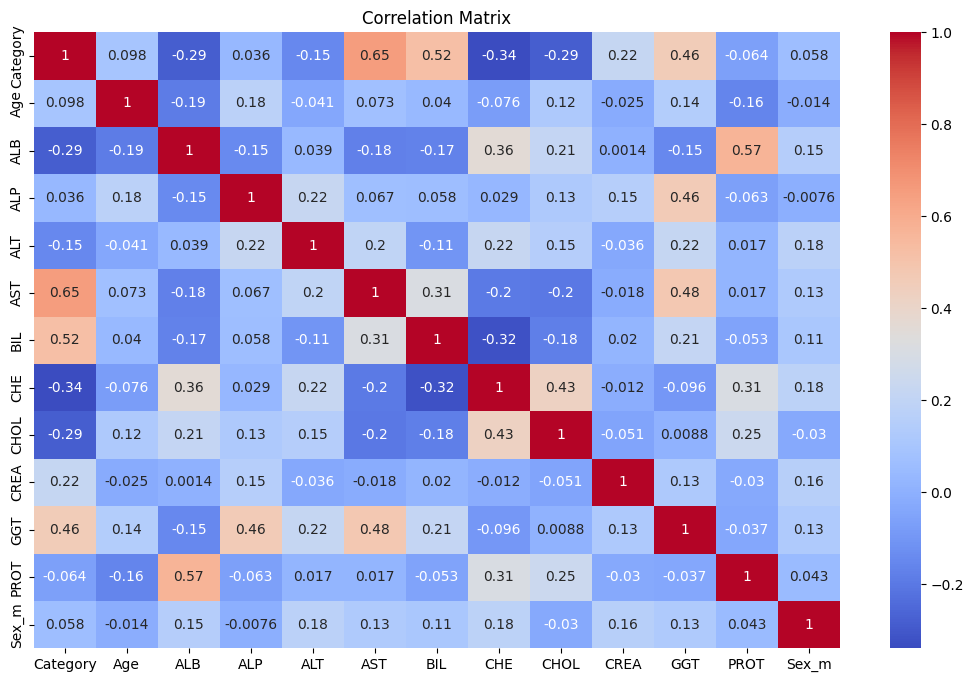

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

#Corelation matrix
plt.figure(figsize=(13,8))
corr_matrix = df_encoded.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


From the correlations matrix we can observe how the biggest correlations, either positive or negative, are associated with the Category variable, meaning they are associated with the state of disease (Healthy, Hepatitis, Fibrosis, Cirrhosis) but taking a look at the numbers, any of them are strong correlations, as the highest one is +0.65.

Having a look at the matrix, an interesting target to predict with linear regression would be AST (Alanine transaminase), as it is associated with hepatic disease and it have some moderate correlations with other parameters.

First step into the regression model is to check and remove outliers but doing this in all the dataset could produce data leackage, so before that we need to divide the dataset into train and test datasets.
In this case our target will be AST and the features will be the rest of the parameters in the dataset

# Regression

In [9]:

from sklearn.model_selection import train_test_split

#We use df_without_na here because is the previous dataset before encoding for correlation visualization, so we use it to avoid data leackage
#Features (X) and target (y)
X = df_without_na.drop('ALT', axis=1)
y = df_without_na["ALT"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Once we have the dataset divided, we can encode categorical variables for X_train and X_test

In [10]:
#One-Hot Encoding method for Sex column
X_train = pd.get_dummies(X_train, columns=["Sex"], drop_first=True, dtype=int)
X_test = pd.get_dummies(X_test, columns=["Sex"], drop_first=True, dtype=int)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

#Label Encoding method for Category column
encoder = LabelEncoder()
X_train["Category"] = encoder.fit_transform(X_train["Category"])
X_test["Category"] = encoder.transform(X_test["Category"])



Next, we can remove outliers calculating z scores in the training set and removing the ones that are too far away from the average value (3 standard deviations is the typical threshold)

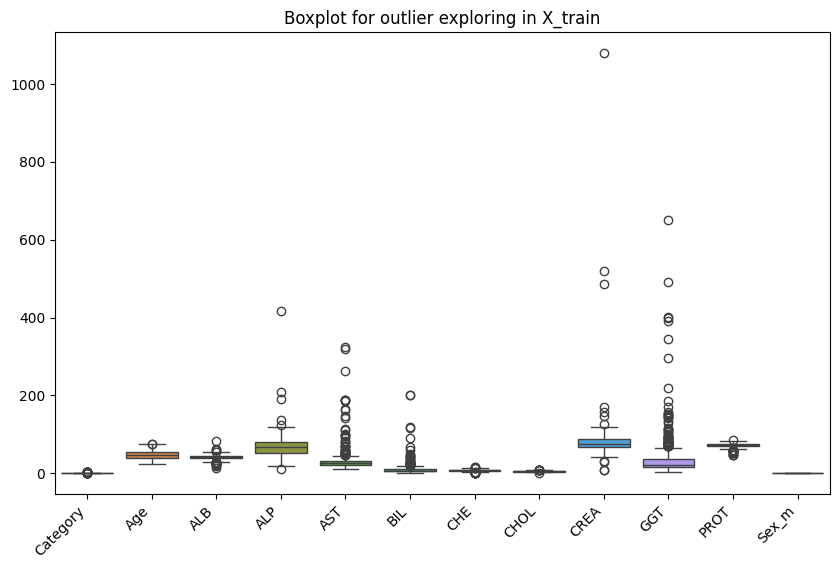

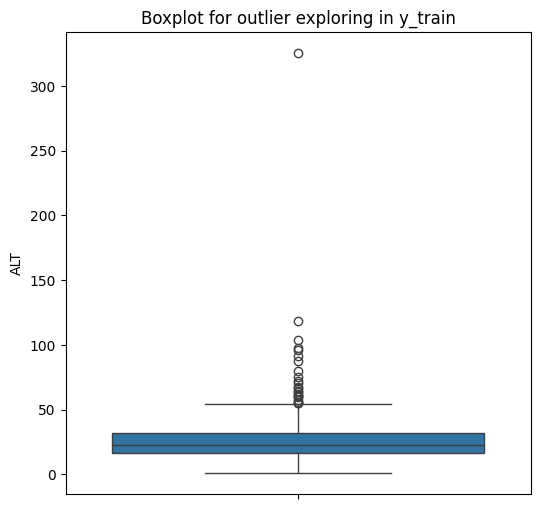

Number of rows for X_train: 418
Number of columns for X_train: 12
Number of rows for y_train: 418

Original dataset: 589
Rows after eliminating outliers: 418
Outliers removed: 171


In [11]:
import numpy as np
from scipy.stats import zscore

#Boxplot for exploring outliers in feature train data
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_train)
plt.xticks(rotation=45, ha='right')
plt.title("Boxplot for outlier exploring in X_train")
plt.show()

#Boxplot for exploring outliers in target train data
plt.figure(figsize=(6, 6))
sns.boxplot(data=y_train)
plt.xticks(rotation=45, ha='right')
plt.title("Boxplot for outlier exploring in y_train")
plt.show()

#Calculate z scores for X_train and y_train
z_scores_X = np.abs(zscore(X_train))
z_score_y = np.abs(zscore(y_train))

# Define threshold to remove outliers
threshold = 3

# Create masks for both X and y training data
mask_train_X = (z_scores_X < threshold).all(axis=1)
mask_train_y = (z_score_y < threshold) # y_train is 1D, no need for .all(axis=1)

# Combine masks: keep rows where there are no outliers in either X or y
combined_mask_train = mask_train_X & mask_train_y

X_train_clean = X_train[combined_mask_train]
y_train_clean = y_train[combined_mask_train]

print("Number of rows for X_train: {0}\nNumber of columns for X_train: {1}".format(X_train_clean.shape[0], X_train_clean.shape[1]))
print("Number of rows for y_train: {}\n".format(y_train_clean.shape[0]))

#Number of outliers removed
print(f'Original dataset: {df_encoded.shape[0]}')
print(f"Rows after eliminating outliers: {X_train_clean.shape[0]}")
print(f"Outliers removed: {df_encoded.shape[0] - X_train_clean.shape[0]}")

Checking the boxplots for training data (both features and target) we can observe very obvious outliers that must be removed.
The outliers have been removed calculating the z score and removing the rows with a z score higher than 3 in both X and y training data.

After outlier removal, we can see that the rows of both X_train and y_train are the same, so the analysis continue.

The next step is to check if the distribution of data is normal on each variable. For this, histogram plots have been created.

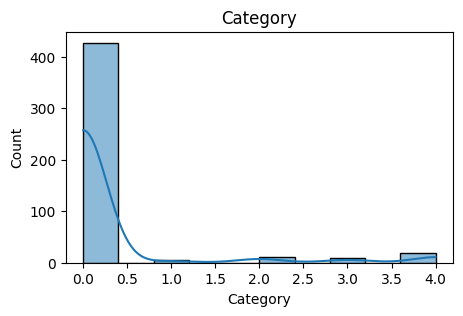

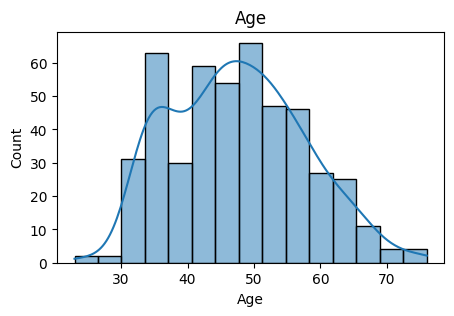

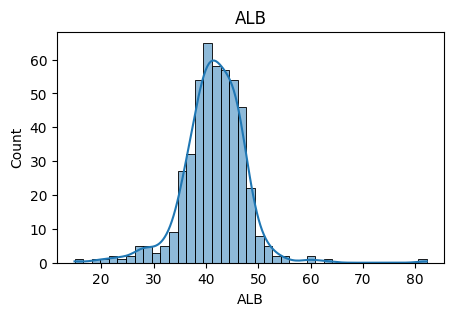

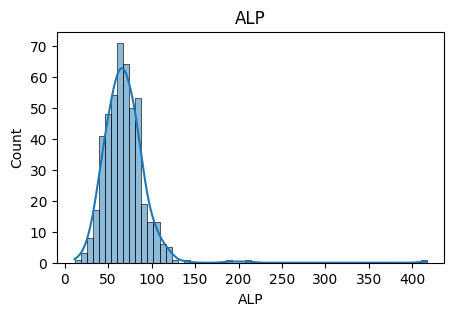

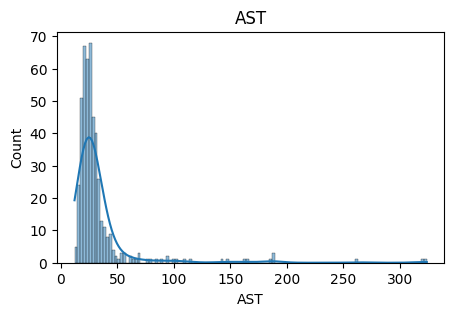

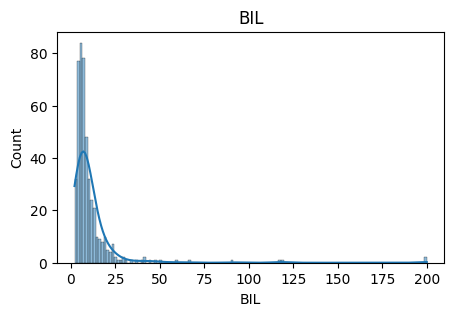

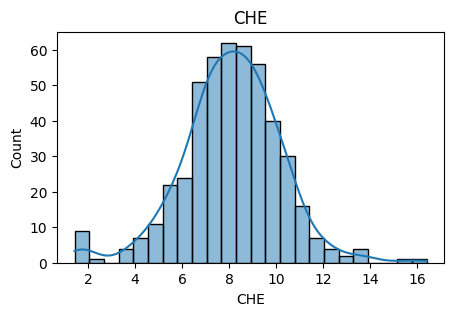

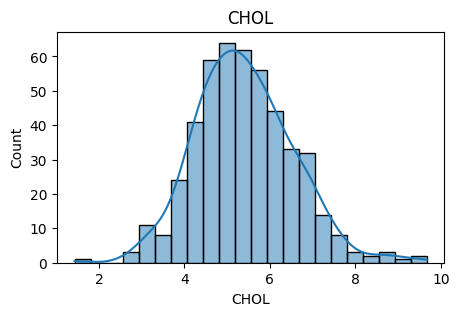

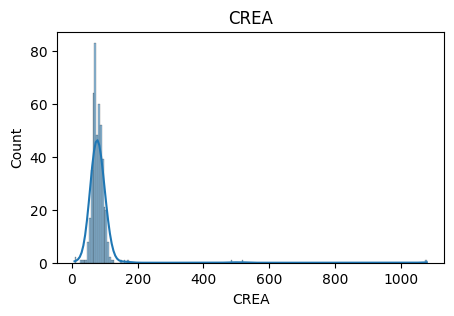

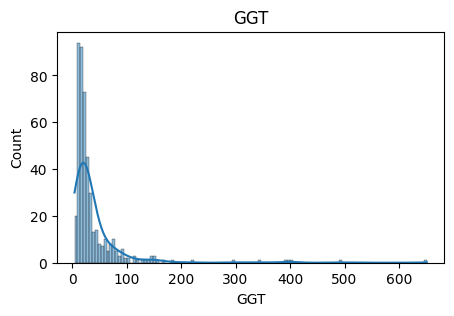

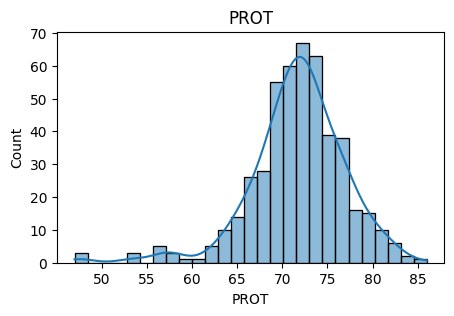

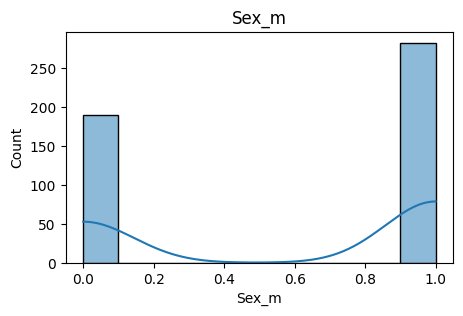

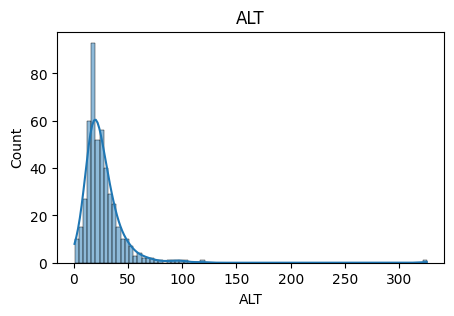

In [12]:
#Distribution of data of each variable before transformation
for col in X_train.columns:
    plt.figure(figsize=(5,3))
    sns.histplot(X_train[col], kde=True)
    plt.title(f"{col}")
    plt.show()
#Distribution of the target train data before transformation

plt.figure(figsize=(5,3))
sns.histplot(y_train, kde=True)
plt.title(f"ALT")
plt.show()


Many of the variables have highly skewed distributions, to it could be interesting to apply logaritmic transformation and scaling to see if the distributions can be normalized.

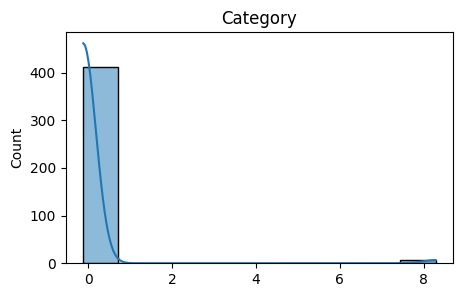

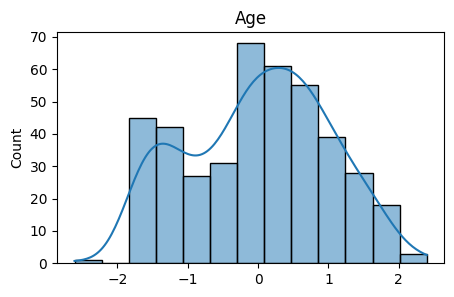

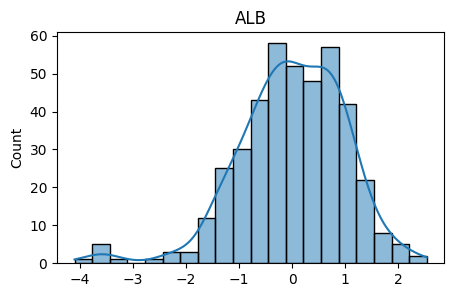

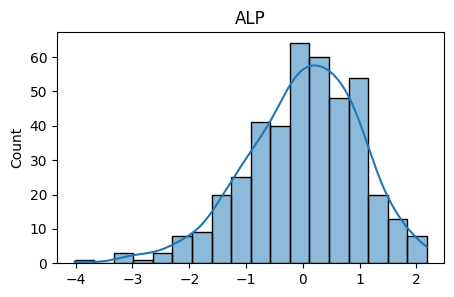

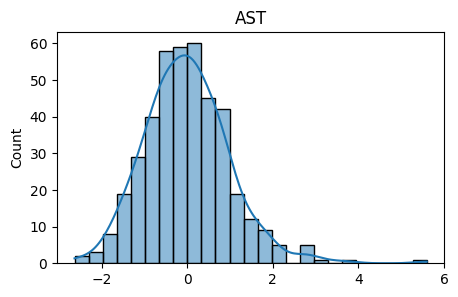

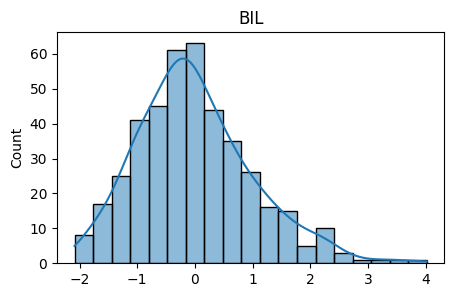

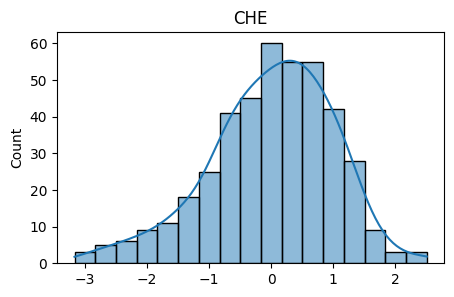

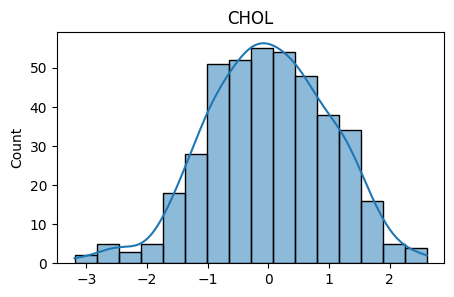

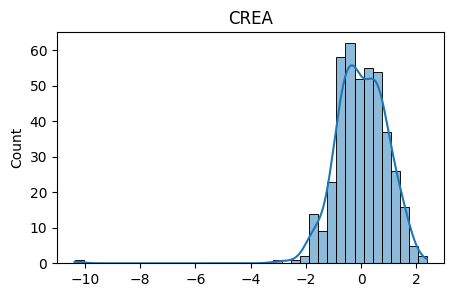

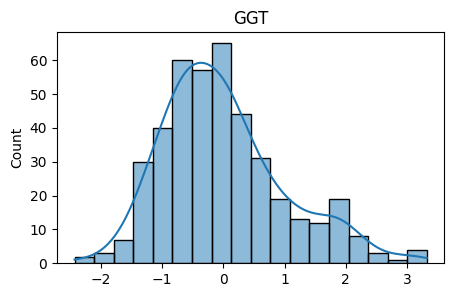

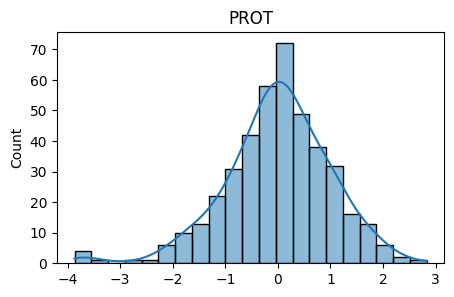

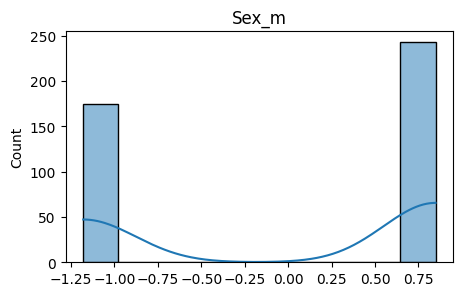

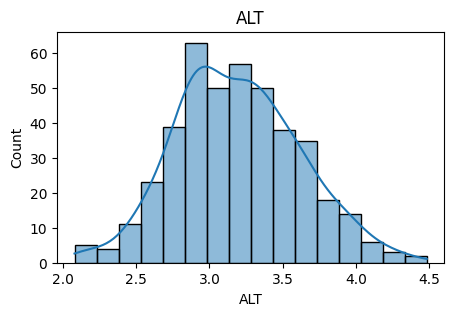

In [13]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

#Log transformation of both train and test data
#Clean refers to the dataset that was filtered to remove outliers based on z score
X_train_log = np.log1p(X_train_clean)
X_test_log  = np.log1p(X_test)
y_train_log = np.log1p(y_train_clean)

#Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_log)
X_test_scaled  = scaler.transform(X_test_log)

#Distribution of data of each variable after transformation
for i, col in enumerate(X_train.columns): # Use enumerate to get the index and column name
    plt.figure(figsize=(5,3))
    sns.histplot(X_train_scaled[:, i], kde=True) # Use integer index i for NumPy array
    plt.title(f"{col}")
    plt.show()

#Distribution of the target train data after transformation
plt.figure(figsize=(5,3))
sns.histplot(y_train_log, kde=True) #Target has not been scaled because it is not needed
plt.title(f"ALT")
plt.show()


Comparing the histograms before and after log transformation, a big difference is seen. After the log transformation, the histograms show a more normal distribution even though there are still some variables with a little bit of skew.

Now the dataset is ready to perform Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression

#Fitting the model
model = LinearRegression()
model.fit(X_train_scaled, y_train_log)

# Predict target and revert log
y_pred_log = model.predict(X_test_scaled)
y_pred = np.expm1(y_pred_log)  # inverse of log1p

# Evaluate metrics in the original scale
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("R2:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

R2: 0.47953358131443125
MSE: 250.25680556410438
MAE: 7.392160496846417


The results shows 0.47 of r score and a MSE of 250.5. An R score of 0.47 means the model can only predict approximately 50% of the variability, which is not ideal for a model. Probably the fact that some variable are still a little bit skewed and the moderate to low correlation between variables explain this result.
Next step is to calculate the same metrics in the training data to see if the model is overfitted or not

In [18]:
mae_train = mean_absolute_error(y_train_log, model.predict(X_train_scaled))
r2_train = r2_score(y_train_log, model.predict(X_train_scaled))
mse_train = mean_squared_error(y_train_log, model.predict(X_train_scaled))

print(f'R2 score (training): {r2_train}')
print(f'Mean squared error (training): {mse_train}')
print(f'Mean absolute error (training): {mae_train}')

R2 score (training): 0.6318500421124913
Mean squared error (training): 0.06613679105516569
Mean absolute error (training): 0.1959062064911305


As seen in the training metrics, the difference between the r2 score of training data and test data is quite high, meaning that the model is overfitted.
In order to try to improve the it, Ridge y Lasso correlations will be tested.

In [19]:
from sklearn.linear_model import Ridge

#Fit linear regression model using Ridge regularization
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train_log)#Y_train has not been scaled, that's why log data is used instead

#Model prediction
y_pred_ridge = ridge_model.predict(X_test_scaled)

#Regression model metrics
print("R2:", r2_score(y_test, y_pred_ridge))
print("MSE:", mean_squared_error(y_test, y_pred_ridge))

R2: -1.0910494668859054
MSE: 1005.4430815747459


Applying Ridge the MSE and r score are way worse than before, so it would be interesting to apply Lasso to see if we can get better metrics

In [20]:
from sklearn.linear_model import Lasso

#Fit the model using Lasso regularization
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train_scaled, y_train_log)

#Predict target with the model
y_pred_lasso = ridge_model.predict(X_test_scaled)

#Regression model metrics
print("R2:", r2_score(y_test, y_pred_lasso))
print("MSE:", mean_squared_error(y_test, y_pred_lasso))

R2: -1.0910494668859054
MSE: 1005.4430815747459


Ridge and Lasso regularizations give the same r score and MSE, which is way worse that the metrics we got only with log transformation so they do not work for this dataset.
Could be interesting to try ElasticNet with cross validation using GridSearchCV to try different alpha and l1_ratio values

In [21]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

model = ElasticNet(max_iter=10000, random_state=42)

parameters = {
    'l1_ratio':[0, 0.5, 1],
    'alpha': [0.01, 0.1, 1, 10, 100]
}

gridsearch = GridSearchCV(
    estimator=model,
    param_grid=parameters,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2)


gridsearch.fit(X_train_scaled, y_train_log)

print("Best parameters:", gridsearch.best_params_)
print("Best mse (cross-val):", gridsearch.best_score_)

best_model = gridsearch.best_estimator_
print('Best r2 score:', best_model.score(X_test_scaled, y_test))

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters: {'alpha': 0.01, 'l1_ratio': 0.5}
Best mse (cross-val): -0.07192800747699568
Best r2 score: -1.0914054807542612


The r2 score obtained is the same as for Ridge and Lasso regularizations so the model has not been improved really

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Create a pipeline with PolynomialFeatures and LinearRegression
model = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('linear', LinearRegression())
])

# Fit the pipeline on the scaled training data
model.fit(X_train_scaled, y_train_log)

# Make predictions on the scaled test data
y_pred_log = model.predict(X_test_scaled)

# Revert log transformation for evaluation
y_pred = np.expm1(y_pred_log)

# Calculate R2 and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R2:", r2)
print("MSE:", mse)

R2: 0.17117269462134665
MSE: 398.5265261343891


The metrics are worse than the ones we got with log transformation

To summarize, the reason of this moderate to low r-score instead of a high r-score could be in the limitations of the data, the linear regression can only capture aproximately the 50% of the variability and the model has been optimized at its maximum, so as said before, this is not a suitable model for this dataset.

# Classification

For this part of the project, the objective of the dataset is to be able to predict the stage of disease using different laboratory parameters. For this reason, the target used for classification will be the column Category, using the rest of columns as features. This is a typical situation where multi-class classification methods need to be applied as we do not have 2 classes but 4.

There are tow methods that could be used: One-vs-Rest (OvR) or One-vs-One (OvO).OvR is more computationally efficient than OvO but has problems with umbalanced data. So, to decide which method to use, the number of rows of each category in the Category column must be checked to see if we have an umbalanced dataset.

In [23]:
#Check the number of rows of each category
df_without_na.groupby('Category').size()

,0
Category,
0=Blood Donor,526
0s=suspect Blood Donor,7
1=Hepatitis,20
2=Fibrosis,12
3=Cirrhosis,24


As seen in the table above, category 0 has way more data than the rest of category so we are in the case of umbalanced data and the method that handles better this type of datasets is OvO.
Before applying OvO, the initial dataset will be splittd into test and train data, filtered with zscore, log transformed and scaled using StandardScaler

In [24]:
#Define X (features) and y (Target)
X = df_without_na.drop('Category', axis=1)
y = df_without_na['Category']

#Split into test and train
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
#One-Hot Encoding method for Sex column
X_train = pd.get_dummies(X_train, columns=["Sex"], drop_first=True, dtype=int)
X_test = pd.get_dummies(X_test, columns=["Sex"], drop_first=True, dtype=int)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

#Label Encoding method for Category column
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

#Calculate z scores for X_train and y_train
z_scores_X = np.abs(zscore(X_train))
z_score_y = np.abs(zscore(y_train))

# Define threshold to remove outliers
threshold = 3

# Create masks for both X and y training data
mask_train_X = (z_scores_X < threshold).all(axis=1)
mask_train_y = (z_score_y < threshold) # y_train is 1D, no need for .all(axis=1)

# Combine masks: keep rows where there are no outliers in either X or y
combined_mask_train = mask_train_X & mask_train_y

X_train_clean = X_train[combined_mask_train]
y_train_clean = y_train[combined_mask_train]

#Logaritmic transformation
X_train_log = np.log1p(X_train_clean)
X_test_log  = np.log1p(X_test)

#Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_log)
X_test_scaled  = scaler.transform(X_test_log)


After pre-processing data, OvO can be applied to predict target. We will use class_weight='balanced' due to the imbalanced dataset we are working with

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Create a base logistic regression model instance
base_model = LogisticRegression(C=1.0, solver='liblinear', class_weight='balanced')

# 2. Wrap the base model in the OneVsOneClassifier
ovo_model = OneVsOneClassifier(base_model)

# 3. Fit the OvO model
ovo_model.fit(X_train_scaled, y_train_clean)

# 4. Make predictions
y_pred_ovo = ovo_model.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ovo))
print("\nClassification Report:\n", classification_report(y_test, y_pred_ovo))

Confusion Matrix:
 [[98  0  1  0  0]
 [ 2  0  0  0  0]
 [ 0  0  8  0  0]
 [ 0  0  3  0  0]
 [ 2  0  4  0  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98        99
           1       0.00      0.00      0.00         2
           2       0.50      1.00      0.67         8
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         6

    accuracy                           0.90       118
   macro avg       0.29      0.40      0.33       118
weighted avg       0.84      0.90      0.86       118



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Taking a look at the classification report, we see how the class 0 have really good metrics. As we are trying to identify patients with diseases, the most dangerous parameter is the number of false negatives, so the Recall parameter is the most important. Recall values are good only for the classes 0 and 2, which correspond to 'blood donor' (meaning healthy) and hepatitis respectively.
It is good that the model can actually predict healthy patients and patients with hepatitis with high sensitivity but it cannot predict patients with fibrosis and cirrhosis (which should be more easy to identify as the laboratory parameters would be much more altered). Additionally, for patients with hepatitis the precision is not very high (only 50%) meaning that that model is giving 50% of false positives. This is not that bas as false negatives, but it has to be taken into account.

The category 1 correspond to 'suspect blood donor' which is a very confusing category that does not give any good information, so we can ignore it.

As the model is underperforming, we have two options:


*   Oversampling
*   Undersampling

As seen previously, the different of amount of data between class 0 (more than 500 samples) and the rest of classes is quite huge. Reducing data from class 0 won't help much as in the rest of classes we have around of 20 samples, which is quite low for a model to do good predictions. So in this case the best solution is to do oversampling of the minoritary categories, even though this can lead to overfitting. There are different strategies for this:

*   SMOTE: creates syntetic samples for minority classes in an uniform way across the feature space
*   ADASYN: does the same as SMOTE but detects regions where the minority classes are underrepresented and creates syntetic data there, creating a more balanced dataset

Both approaches will be tested to see which one improves the model the most






In [26]:
from imblearn.over_sampling import SMOTE

#Apply SMOTE method
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train_clean)

#Fit OvO model
ovo_model.fit(X_resampled, y_resampled)

#Make predictions
y_pred_smote = ovo_model.predict(X_test_scaled)

#Calculate metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_smote))


Confusion Matrix:
 [[98  0  1  0  0]
 [ 2  0  0  0  0]
 [ 0  0  8  0  0]
 [ 0  0  3  0  0]
 [ 0  0  6  0  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98        99
           1       0.00      0.00      0.00         2
           2       0.44      1.00      0.62         8
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         6

    accuracy                           0.90       118
   macro avg       0.28      0.40      0.32       118
weighted avg       0.85      0.90      0.87       118



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SMOTE really does not help, as it maintains the same metrics for class 0, but worses a bit the class 2 and does nothing fpor the rest of classes

ADASYN will be tested next to see if the metrics can be improved

In [27]:
from imblearn.over_sampling import ADASYN

#Apply ADASYN method
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X_train_scaled, y_train_clean)

#Fit the OvO model
ovo_model.fit(X_resampled, y_resampled)

#Make predictions
y_pred_adasyn = ovo_model.predict(X_test_scaled)

#Calculate metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_adasyn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_adasyn))


Confusion Matrix:
 [[98  0  1  0  0]
 [ 2  0  0  0  0]
 [ 0  0  8  0  0]
 [ 0  0  3  0  0]
 [ 2  0  4  0  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98        99
           1       0.00      0.00      0.00         2
           2       0.50      1.00      0.67         8
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         6

    accuracy                           0.90       118
   macro avg       0.29      0.40      0.33       118
weighted avg       0.84      0.90      0.86       118



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ADASYN method works better than SMOTE but we get exactly the same metrics as OvO model, so we are not improving anything really.

The last thing to try to solve the problem of an imbalanced dataset is hyperparameter tuning with GridSearchCV

In [28]:
from sklearn.model_selection import GridSearchCV

# Define the base model
base_model = LogisticRegression(class_weight='balanced', solver='liblinear')
# Wrap the base model in the OneVsOneClassifier
ovo_model = OneVsOneClassifier(base_model)

# Define the hyperparameter grid
# Here we test L1 and L2 penalties with a range of C values
param_grid = {
    'estimator__solver': ['liblinear'], # Use liblinear solver for L1 penalty
    'estimator__C': [0.01, 0.1, 1, 10, 100]
}
# Set up GridSearchCV
# cv=5 specifies 5-fold cross-validation
# n_jobs=-1 uses all available CPU cores

grid_search = GridSearchCV(
    estimator=ovo_model, # The model to be tuned
    param_grid=param_grid, # The hyperparameter grid to search
    cv=5, # Number of folds for cross-validation
    scoring='precision_macro', # Metric to optimize
    n_jobs=-1, # Use all available CPU cores for parallel processing
    verbose=2
)
# Fit the grid search to the training data (X_resampled and y_resampled from ADASYN)
grid_search.fit(X_resampled, y_resampled)

#Inspect the results
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation precision: {grid_search.best_score_:.3f}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test_scaled)

print("\nConfusion Matrix (Tuned Model):\n", confusion_matrix(y_test, y_pred_tuned))
print("\nClassification Report (Tuned Model):\n", classification_report(y_test, y_pred_tuned))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters found: {'estimator__C': 1, 'estimator__solver': 'liblinear'}
Best cross-validation precision: 0.996

Confusion Matrix (Tuned Model):
 [[98  0  1  0  0]
 [ 2  0  0  0  0]
 [ 0  0  8  0  0]
 [ 0  0  3  0  0]
 [ 2  0  4  0  0]]

Classification Report (Tuned Model):
               precision    recall  f1-score   support

           0       0.96      0.99      0.98        99
           1       0.00      0.00      0.00         2
           2       0.50      1.00      0.67         8
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         6

    accuracy                           0.90       118
   macro avg       0.29      0.40      0.33       118
weighted avg       0.84      0.90      0.86       118



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Hyperparameter tuning with GridSearchCV gives the same results as OvO model with any hyperparameter tuning, so anything has been really improved. As the optimat C parameter is 1 (which is the maximum), testing RandomizedSearchCV won't improve the model metrics

PRUEBA DECISION TREE, RANDOM FOREST Y NAIVE BAYES COMO PARTE DE CLASSIFICATION

mirar si gradient boosting se da también en el temario, al igual que k-nearest neighbours